# Import required libraries

In [1]:
import math
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#from shutil import copyfile
pd.set_option("display.max_colwidth", 200)

In [2]:
#os.mkdir('Chapters')
output_dir = 'Chapters/'

with open('TF-IDF_dataset', encoding = 'utf-8') as fo:
    #print(fo.read())
    op = ''
    start = 0
    counter = 1
    for x in fo.read().split():
        #print(x + "\n-------\n")
        if (x=="Chapter"):
            if (start == 1):
                with open(os.path.join(output_dir,'Chapter' + str(counter) + '.txt'), 'w') as opf:
                    opf.write(op)
                    opf.close()
                    op=''
                    counter+=1
            else:
                start = 1
            
        else:
            if (op == ''):
               op = x
            else:
                op = op + '\n' + x
    fo.close()   
    

In [46]:
#To get list of file Names
file_names = os.listdir('Chapters')
file_names

['Chapter1.txt',
 'Chapter2.txt',
 'Chapter3.txt',
 'Chapter4.txt',
 'Chapter5.txt',
 'Chapter6.txt']

In [47]:
#sample check
file_names[3]

'Chapter4.txt'

In [48]:
#Capture all files into one list of lists

In [5]:
# empty list
documents = []

# read all articles
for f in file_names:
    # open the file
    file = open('Chapters/' +f, mode='rt')#, encoding='utf-8')
    #print
    text = file.read()
    file.close()
    
    documents.append(text)

In [6]:
len(documents)

6

In [49]:
#Sample check
documents[4]

'5\nIt\nwas\non\na\ndreary\nnight\nof\nNovember\nthat\nI\nbeheld\nthe\naccomplishment\nof\nmy\ntoils.\nWith\nan\nanxiety\nthat\nalmost\namounted\nto\nagony,\nI\ncollected\nthe\ninstruments\nof\nlife\naround\nme,\nthat\nI\nmight\ninfuse\na\nspark\nof\nbeing\ninto\nthe\nlifeless\nthing\nthat\nlay\nat\nmy\nfeet.\nIt\nwas\nalready\none\nin\nthe\nmorning;\nthe\nrain\npattered\ndismally\nagainst\nthe\npanes,\nand\nmy\ncandle\nwas\nnearly\nburnt\nout,\nwhen,\nby\nthe\nglimmer\nof\nthe\nhalf-extinguished\nlight,\nI\nsaw\nthe\ndull\nyellow\neye\nof\nthe\ncreature\nopen;\nit\nbreathed\nhard,\nand\na\nconvulsive\nmotion\nagitated\nits\nlimbs.\nHow\ncan\nI\ndescribe\nmy\nemotions\nat\nthis\ncatastrophe,\nor\nhow\ndelineate\nthe\nwretch\nwhom\nwith\nsuch\ninfinite\npains\nand\ncare\nI\nhad\nendeavoured\nto\nform?\nHis\nlimbs\nwere\nin\nproportion,\nand\nI\nhad\nselected\nhis\nfeatures\nas\nbeautiful.\nBeautiful!\nGreat\nGod!\nHis\nyellow\nskin\nscarcely\ncovered\nthe\nwork\nof\nmuscles\nand\narteri

# Preprocessing Text

In [50]:
clean_documents = []
# clean the documents and store it in the list clean_documents
for i in documents:
    clean_documents.append(i.replace("\n"," ").replace("\'", " "))

In [10]:
clean_documents[4]

'5 It was on a dreary night of November that I beheld the accomplishment of my toils. With an anxiety that almost amounted to agony, I collected the instruments of life around me, that I might infuse a spark of being into the lifeless thing that lay at my feet. It was already one in the morning; the rain pattered dismally against the panes, and my candle was nearly burnt out, when, by the glimmer of the half-extinguished light, I saw the dull yellow eye of the creature open; it breathed hard, and a convulsive motion agitated its limbs. How can I describe my emotions at this catastrophe, or how delineate the wretch whom with such infinite pains and care I had endeavoured to form? His limbs were in proportion, and I had selected his features as beautiful. Beautiful! Great God! His yellow skin scarcely covered the work of muscles and arteries beneath; his hair was of a lustrous black, and flowing; his teeth of a pearly whiteness; but these luxuriances only formed a more horrid contrast wi

In [51]:
#Let's remove numbers, punctuation, and special characters (!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n).

In [52]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
for i in symbols:
    clean_documents = np.char.replace(clean_documents, i, ' ')

In [53]:
# strip everthing except alphabets from the text
clean_documents = [re.sub("[^a-zA-Z]"," ",x) for x in clean_documents]

In [54]:
#sample check
clean_documents[4]

'  It was on a dreary night of November that I beheld the accomplishment of my toils  With an anxiety that almost amounted to agony  I collected the instruments of life around me  that I might infuse a spark of being into the lifeless thing that lay at my feet  It was already one in the morning  the rain pattered dismally against the panes  and my candle was nearly burnt out  when  by the glimmer of the half extinguished light  I saw the dull yellow eye of the creature open  it breathed hard  and a convulsive motion agitated its limbs  How can I describe my emotions at this catastrophe  or how delineate the wretch whom with such infinite pains and care I had endeavoured to form  His limbs were in proportion  and I had selected his features as beautiful  Beautiful  Great God  His yellow skin scarcely covered the work of muscles and arteries beneath  his hair was of a lustrous black  and flowing  his teeth of a pearly whiteness  but these luxuriances only formed a more horrid contrast wi

In [55]:
# To convert to lower case
clean_documents = [x.lower() for x in clean_documents]

In [56]:
#sample check
clean_documents[4]

'  it was on a dreary night of november that i beheld the accomplishment of my toils  with an anxiety that almost amounted to agony  i collected the instruments of life around me  that i might infuse a spark of being into the lifeless thing that lay at my feet  it was already one in the morning  the rain pattered dismally against the panes  and my candle was nearly burnt out  when  by the glimmer of the half extinguished light  i saw the dull yellow eye of the creature open  it breathed hard  and a convulsive motion agitated its limbs  how can i describe my emotions at this catastrophe  or how delineate the wretch whom with such infinite pains and care i had endeavoured to form  his limbs were in proportion  and i had selected his features as beautiful  beautiful  great god  his yellow skin scarcely covered the work of muscles and arteries beneath  his hair was of a lustrous black  and flowing  his teeth of a pearly whiteness  but these luxuriances only formed a more horrid contrast wi

In [17]:
#Now we will check the most frequent words appearing in the documents.

In [18]:

# function to plot top 30 most frequent words
def freq_words(x, terms = 30):
  # combine all the documents  
  text = ' '.join([text for text in x])
  # split text into words   
  all_words = text.split()
  
  # prepare a dictionary of word-frequency pairs
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  
  # plot the word counts  
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

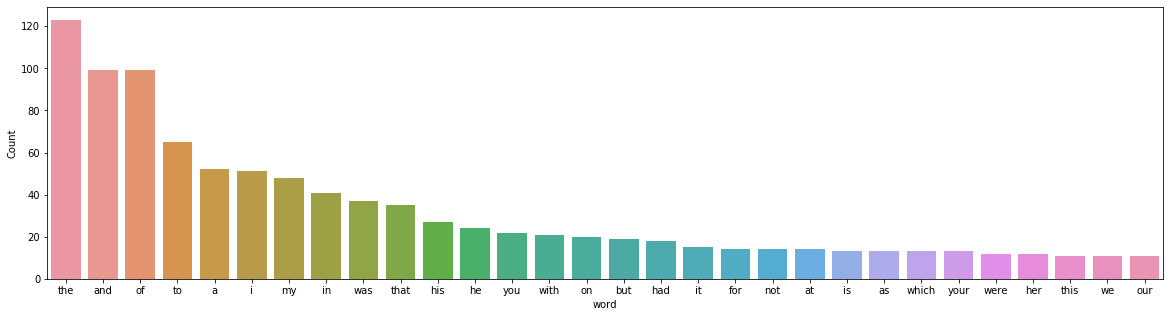

In [57]:
freq_words(clean_documents)

#Words like 'the', 'and', 'for', 'on' etc. are in large numbers and they don't really tell us anything about any topic or idea. Hence, we should take off these sort of words and let the more important words come up.

2. Lemmatize Text and Strip Stopwords

In [58]:
# load spaCy model
nlp = spacy.load('en_core_web_sm')

In [59]:
# lemmatization
clean_documents = [' '.join([token.lemma_ for token in nlp(x)]) for x in clean_documents]

# remove stopwords
clean_documents = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_documents]

In [62]:
#Remove the Pronoun tag
clean_documents = list(map(lambda st: str.replace(st, "-PRON-", ""), clean_documents))

In [63]:
#sample check
clean_documents[3]

'day natural philosophy particularly chemistry comprehensive sense term nearly  sole occupation read ardour work genius discrimination modern inquirer write subject attend lecture cultivate acquaintance man science university find m krempe great deal sound sense real information combine  true repulsive physiognomy manner account valuable m waldman find true friend  gentleness tinge dogmatism  instruction air frankness good nature banish idea pedantry thousand way  smooth  path knowledge abstruse inquiry clear facile  apprehension  application fluctuate uncertain  gain strength proceed soon ardent eager star disappear light morning whilst engage  laboratory apply closely  easily conceive  progress rapid  ardour astonishment student  proficiency master professor krempe ask  sly smile cornelius agrippa whilst m waldman express heartfelt exultation  progress year pass manner pay visit geneva engage heart soul pursuit discovery hope experience  conceive enticement science study  far  know s

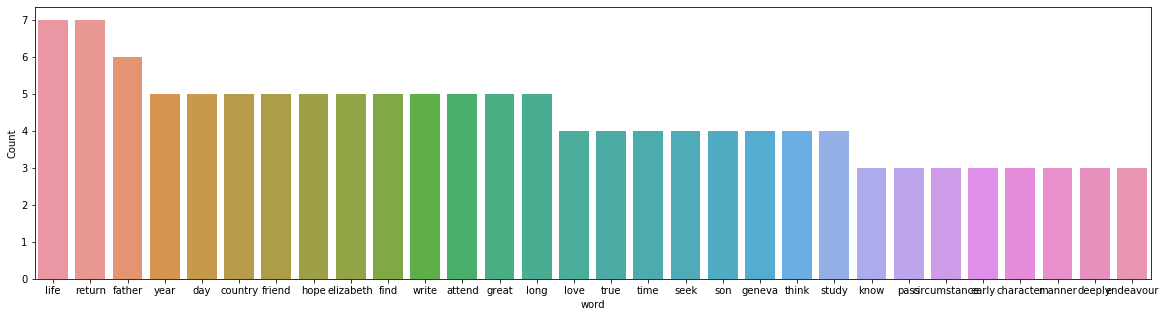

In [24]:
freq_words(clean_documents)

In [64]:
#sample check
clean_documents[1]

' bring year difference  age need  stranger specie disunion dispute harmony soul  companionship diversity contrast subsist  character draw  nearer elizabeth calmer concentrated disposition  ardour capable intense application deeply smitten thirst knowledge  busy  follow aerial creation poet majestic wondrous scene surround  swiss home sublime shape mountain change season tempest calm silence winter life turbulence  alpine summer  find ample scope admiration delight  companion contemplate satisfied spirit magnificent appearance thing delight investigate  cause world  secret desire divine curiosity earnest research learn hide law nature gladness akin rapture  unfold  early sensation remember birth second son  junior seven year  parent entirely  wander life fix   native country  possess house geneva campagne belrive eastern shore lake distance league city  reside principally life  parent pass considerable seclusion   temper avoid crowd attach  fervently indifferent  school fellow general 

In [26]:
clean_documents

['birth genevese  family distinguished republic  ancestor year counsellor syndic  father fill public situation honour reputation  respect know   integrity indefatigable attention public business  pass  young day perpetually occupy affair  country variety circumstance prevent  marry early  decline life  husband father family circumstance  marriage illustrate  character refrain relate   intimate friend merchant flourish state fall numerous mischance poverty man beaufort proud unbend disposition bear live poverty oblivion country  distinguish  rank magnificence pay  debt honourable manner  retreat  daughter town lucerne  live unknown wretchedness  father love beaufort true friendship deeply grieve  retreat unfortunate circumstance  bitterly deplore false pride lead  friend conduct little worthy affection unite   lose time endeavour seek  hope persuade  begin world  credit assistance',
 ' bring year difference  age need  stranger specie disunion dispute harmony soul  companionship diversit

In [27]:
len(clean_documents)

6

In [28]:
type(clean_documents)

list

In [65]:
#Split the list of list into words

In [29]:
split_documents = []
for i in range(len(clean_documents)):
    split_documents.append(clean_documents[i].split())
print(split_documents)

[['birth', 'genevese', 'family', 'distinguished', 'republic', 'ancestor', 'year', 'counsellor', 'syndic', 'father', 'fill', 'public', 'situation', 'honour', 'reputation', 'respect', 'know', 'integrity', 'indefatigable', 'attention', 'public', 'business', 'pass', 'young', 'day', 'perpetually', 'occupy', 'affair', 'country', 'variety', 'circumstance', 'prevent', 'marry', 'early', 'decline', 'life', 'husband', 'father', 'family', 'circumstance', 'marriage', 'illustrate', 'character', 'refrain', 'relate', 'intimate', 'friend', 'merchant', 'flourish', 'state', 'fall', 'numerous', 'mischance', 'poverty', 'man', 'beaufort', 'proud', 'unbend', 'disposition', 'bear', 'live', 'poverty', 'oblivion', 'country', 'distinguish', 'rank', 'magnificence', 'pay', 'debt', 'honourable', 'manner', 'retreat', 'daughter', 'town', 'lucerne', 'live', 'unknown', 'wretchedness', 'father', 'love', 'beaufort', 'true', 'friendship', 'deeply', 'grieve', 'retreat', 'unfortunate', 'circumstance', 'bitterly', 'deplore',

In [66]:
#sample check
split_documents[4]

['dreary',
 'night',
 'november',
 'behold',
 'accomplishment',
 'toil',
 'anxiety',
 'agony',
 'collect',
 'instrument',
 'life',
 'infuse',
 'spark',
 'lifeless',
 'thing',
 'lie',
 'foot',
 'morning',
 'rain',
 'patter',
 'dismally',
 'pane',
 'candle',
 'nearly',
 'burn',
 'glimmer',
 'half',
 'extinguish',
 'light',
 'dull',
 'yellow',
 'eye',
 'creature',
 'open',
 'breathe',
 'hard',
 'convulsive',
 'motion',
 'agitate',
 'limb',
 'describe',
 'emotion',
 'catastrophe',
 'delineate',
 'wretch',
 'infinite',
 'pain',
 'care',
 'endeavour',
 'form',
 'limb',
 'proportion',
 'select',
 'feature',
 'beautiful',
 'beautiful',
 'great',
 'god',
 'yellow',
 'skin',
 'scarcely',
 'cover',
 'work',
 'muscle',
 'artery',
 'beneath',
 'hair',
 'lustrous',
 'black',
 'flow',
 'tooth',
 'pearly',
 'whiteness',
 'luxuriance',
 'form',
 'horrid',
 'contrast',
 'watery',
 'eye',
 'colour',
 'dun',
 'white',
 'socket',
 'set',
 'shrivelled',
 'complexion',
 'straight',
 'black',
 'lip',
 'chapte

In [68]:
#calculate document presence/frequency of a word

In [71]:
word_freq = {}   
for i in range(len(split_documents)):
    tokens = split_documents[i]
    for w in tokens:
        try:
            word_freq[w].add(i)  #add the word as key 
        except:
            word_freq[w] = {i}  #if it exists already, do not add.

In [72]:
word_freq

{'birth': {0, 1},
 'genevese': {0},
 'family': {0},
 'distinguished': {0},
 'republic': {0},
 'ancestor': {0},
 'year': {0, 1, 3},
 'counsellor': {0},
 'syndic': {0},
 'father': {0, 2, 4},
 'fill': {0},
 'public': {0},
 'situation': {0},
 'honour': {0},
 'reputation': {0},
 'respect': {0},
 'know': {0, 3, 5},
 'integrity': {0},
 'indefatigable': {0},
 'attention': {0, 2},
 'business': {0},
 'pass': {0, 1, 3},
 'young': {0, 2},
 'day': {0, 2, 3, 5},
 'perpetually': {0},
 'occupy': {0},
 'affair': {0},
 'country': {0, 1, 2, 4},
 'variety': {0},
 'circumstance': {0},
 'prevent': {0, 4},
 'marry': {0},
 'early': {0, 1, 2},
 'decline': {0},
 'life': {0, 1, 2, 4},
 'husband': {0},
 'marriage': {0},
 'illustrate': {0},
 'character': {0, 1},
 'refrain': {0, 2},
 'relate': {0, 5},
 'intimate': {0},
 'friend': {0, 3, 4},
 'merchant': {0, 1},
 'flourish': {0},
 'state': {0},
 'fall': {0},
 'numerous': {0},
 'mischance': {0},
 'poverty': {0},
 'man': {0, 3},
 'beaufort': {0},
 'proud': {0},
 'unbe

In [73]:
#calculate the term frequency across the documents
for i in word_freq:
    word_freq[i] = len(word_freq[i])  #Counting the number of times a word(key)is in the whole corpus thus giving us the frequency of that word.


In [74]:
word_freq

{'birth': 2,
 'genevese': 1,
 'family': 1,
 'distinguished': 1,
 'republic': 1,
 'ancestor': 1,
 'year': 3,
 'counsellor': 1,
 'syndic': 1,
 'father': 3,
 'fill': 1,
 'public': 1,
 'situation': 1,
 'honour': 1,
 'reputation': 1,
 'respect': 1,
 'know': 3,
 'integrity': 1,
 'indefatigable': 1,
 'attention': 2,
 'business': 1,
 'pass': 3,
 'young': 2,
 'day': 4,
 'perpetually': 1,
 'occupy': 1,
 'affair': 1,
 'country': 4,
 'variety': 1,
 'circumstance': 1,
 'prevent': 2,
 'marry': 1,
 'early': 3,
 'decline': 1,
 'life': 4,
 'husband': 1,
 'marriage': 1,
 'illustrate': 1,
 'character': 2,
 'refrain': 2,
 'relate': 2,
 'intimate': 1,
 'friend': 3,
 'merchant': 2,
 'flourish': 1,
 'state': 1,
 'fall': 1,
 'numerous': 1,
 'mischance': 1,
 'poverty': 1,
 'man': 2,
 'beaufort': 1,
 'proud': 1,
 'unbend': 1,
 'disposition': 2,
 'bear': 1,
 'live': 1,
 'oblivion': 1,
 'distinguish': 1,
 'rank': 1,
 'magnificence': 1,
 'pay': 2,
 'debt': 1,
 'honourable': 1,
 'manner': 2,
 'retreat': 1,
 'daught

In [36]:
type(word_freq)

dict

In [37]:
len(split_documents)

6

In [75]:
#Calculating Term Frequency (frequency of term / total words in the document)

In [79]:
for i in word_freq:
    word_freq[i] = word_freq[i]/len(split_documents)

In [80]:
word_freq

{'birth': 0.3333333333333333,
 'genevese': 0.16666666666666666,
 'family': 0.16666666666666666,
 'distinguished': 0.16666666666666666,
 'republic': 0.16666666666666666,
 'ancestor': 0.16666666666666666,
 'year': 0.5,
 'counsellor': 0.16666666666666666,
 'syndic': 0.16666666666666666,
 'father': 0.5,
 'fill': 0.16666666666666666,
 'public': 0.16666666666666666,
 'situation': 0.16666666666666666,
 'honour': 0.16666666666666666,
 'reputation': 0.16666666666666666,
 'respect': 0.16666666666666666,
 'know': 0.5,
 'integrity': 0.16666666666666666,
 'indefatigable': 0.16666666666666666,
 'attention': 0.3333333333333333,
 'business': 0.16666666666666666,
 'pass': 0.5,
 'young': 0.3333333333333333,
 'day': 0.6666666666666666,
 'perpetually': 0.16666666666666666,
 'occupy': 0.16666666666666666,
 'affair': 0.16666666666666666,
 'country': 0.6666666666666666,
 'variety': 0.16666666666666666,
 'circumstance': 0.16666666666666666,
 'prevent': 0.3333333333333333,
 'marry': 0.16666666666666666,
 'earl

# Top 20 words which has the Highest Term Frequency

In [81]:
top20_termFreq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
print("The top 20 value pairs are \n " + str(top20_termFreq)) 

The top 20 value pairs are 
 {'day': 0.6666666666666666, 'country': 0.6666666666666666, 'life': 0.6666666666666666, 'love': 0.6666666666666666, 'hope': 0.6666666666666666, 'find': 0.6666666666666666, 'write': 0.6666666666666666, 'think': 0.6666666666666666, 'year': 0.5, 'father': 0.5, 'know': 0.5, 'pass': 0.5, 'early': 0.5, 'friend': 0.5, 'true': 0.5, 'time': 0.5, 'endeavour': 0.5, 'seek': 0.5, 'world': 0.5, 'application': 0.5}


In [82]:
#Calculate inverse document frequency

In [83]:
def idf():
    idfDict = {}
    for word in word_freq:
        idfDict[word] = math.log(len(split_documents) / word_freq[word])
    return idfDict
idfDict = idf()

In [84]:
idfDict

{'birth': 2.8903717578961645,
 'genevese': 3.58351893845611,
 'family': 3.58351893845611,
 'distinguished': 3.58351893845611,
 'republic': 3.58351893845611,
 'ancestor': 3.58351893845611,
 'year': 2.4849066497880004,
 'counsellor': 3.58351893845611,
 'syndic': 3.58351893845611,
 'father': 2.4849066497880004,
 'fill': 3.58351893845611,
 'public': 3.58351893845611,
 'situation': 3.58351893845611,
 'honour': 3.58351893845611,
 'reputation': 3.58351893845611,
 'respect': 3.58351893845611,
 'know': 2.4849066497880004,
 'integrity': 3.58351893845611,
 'indefatigable': 3.58351893845611,
 'attention': 2.8903717578961645,
 'business': 3.58351893845611,
 'pass': 2.4849066497880004,
 'young': 2.8903717578961645,
 'day': 2.1972245773362196,
 'perpetually': 3.58351893845611,
 'occupy': 3.58351893845611,
 'affair': 3.58351893845611,
 'country': 2.1972245773362196,
 'variety': 3.58351893845611,
 'circumstance': 3.58351893845611,
 'prevent': 2.8903717578961645,
 'marry': 3.58351893845611,
 'early': 2.

# Top 20 words which has the Highest Inverse Document Frequency

In [85]:
top20_idfDict = dict(sorted(idfDict.items(), key=lambda x: x[1], reverse=True)[:10])
print("The top 20 value pairs are \n " + str(top20_idfDict)) 

The top 20 value pairs are 
 {'genevese': 3.58351893845611, 'family': 3.58351893845611, 'distinguished': 3.58351893845611, 'republic': 3.58351893845611, 'ancestor': 3.58351893845611, 'counsellor': 3.58351893845611, 'syndic': 3.58351893845611, 'fill': 3.58351893845611, 'public': 3.58351893845611, 'situation': 3.58351893845611}


# Top 20 words which has the Lowest Inverse Document Frequency

In [86]:
least20_idfDict = dict(sorted(idfDict.items(), key=lambda x: x[1], reverse=False)[:10])
print("The top 20 value pairs are \n " + str(least20_idfDict)) 

The top 20 value pairs are 
 {'day': 2.1972245773362196, 'country': 2.1972245773362196, 'life': 2.1972245773362196, 'love': 2.1972245773362196, 'hope': 2.1972245773362196, 'find': 2.1972245773362196, 'write': 2.1972245773362196, 'think': 2.1972245773362196, 'year': 2.4849066497880004, 'father': 2.4849066497880004}


In [87]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [88]:
final_words = computeTFIDF(word_freq, idfDict)

In [89]:
type(final_words)

dict

# The top 10 words which have the highest TF-IDF Value

In [90]:
sort_words = dict(sorted(final_words.items(), key=lambda x: x[1], reverse=True)[:10])
print("The top 10 value pairs are \n " + str(sort_words)) 


The top 10 value pairs are 
 {'day': 1.464816384890813, 'country': 1.464816384890813, 'life': 1.464816384890813, 'love': 1.464816384890813, 'hope': 1.464816384890813, 'find': 1.464816384890813, 'write': 1.464816384890813, 'think': 1.464816384890813, 'year': 1.2424533248940002, 'father': 1.2424533248940002}


In [91]:
print('[' + ', '.join(sort_words.keys()) + ']')

[day, country, life, love, hope, find, write, think, year, father]
